### Question 1


 37
Initial centroids: [[571.59318841283607, 717.1617230095269], [250.23069140441098, 731.48696417134579], [657.17675431578448, 764.26363549902828]]
  Final centroids: [array([ 545.76799313,  660.37431436]), array([ 203.29168155,  331.43891293]), array([ 752.84230519,  680.96596742])]


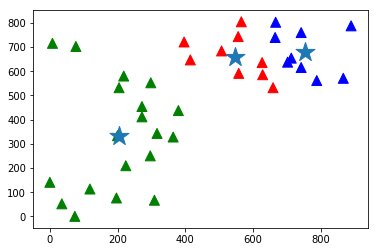

In [11]:
import numpy as np
import random
from matplotlib import pyplot as pp
import pandas as pd

with open('data/cities_distances_xy.txt', 'r') as f:
    data = f.readlines()

arr_points = []
data = list(filter(lambda x: x != '\n', data[1:]))
for pair in data:
    temp = list(map(float, pair.strip('\n').split('\t')))
    arr_points.append(temp)
    
arr_points = np.array(arr_points)
arr_closest = np.zeros(arr_points.shape[0], dtype='int8')
n = arr_points.shape[0]     #nr. of points
print ('\n', n)
k = 3               #nr. of clusters

import math
def metric(first, second):
    return math.sqrt((first[0]-second[0])**2+(first[1]-second[1])**2)

random.seed(42)     #for repeatability
centroids = []
#Initializes the centroids with random.uniform points
for i in range(k):
    cent = [
        random.uniform(arr_points[0][0], arr_points[-1][0]),
        random.uniform(arr_points[0][1], arr_points[-1][1])
    ]
    centroids.append(cent)

print('Initial centroids:', centroids)

#Creates a 0-initialized list based on centroids size
new_centroids = [[0.0]*2]*k
change = 1.0

while change > 1e-4:    #main loop of K-means iteration
    #for each point, find which centroid is closest
    for i in range(n):  #for every point
        distances = []
        for j in range(k):      #per centroid
            distances.append(metric(arr_points[i],centroids[j]))
        arr_closest[i] = distances.index(min(distances))#index where min occurs
    
    #find new centroids for each of k sets of points
    summation  = [0]*k
    counter    = [0]*k
    difference = [0]*k
    
    # Adds all the points to a total per centroid and counts how many
    for i in range(n):
        summation[arr_closest[i]] += arr_points[i]
        counter[arr_closest[i]] += 1
    # Gets new centroids by diving summation by counter
    for j in range(k):
        if counter[j] == 0:
            # One of the centroids doesn't have a point near
            print('ERROR - Empty set!')
            sys.exit(0)
        new_centroids[j] = summation[j]/float(counter[j])
        difference[j] = metric(new_centroids[j], centroids[j])
    # Measures the difference between centroid changes    
    change = sum(difference)
    centroids = new_centroids[:]
    
print('  Final centroids:', centroids)

#for each point, find which centroid is closest
for i in range(n):  #for every point
        distances = []
        for j in range(k):      #per centroid
            #append distance between each centroid and point
            distances.append(metric(arr_points[i],centroids[j]))
        arr_closest[i] = distances.index(min(distances))#index where min occurs

color_dict = {0:'red', 1:'green', 2:'blue'}
colors = [color_dict[x] for x in arr_closest]
pp.scatter(arr_points[:,0],arr_points[:,1], c=colors, s=100, marker="^")
pp.scatter(arr_points[:,0],arr_points[:,1], c=colors, s=10,)
cent = np.array(centroids)
pp.scatter(cent[:,0],cent[:,1],s=400, marker='*')
pp.show()



### Question 2

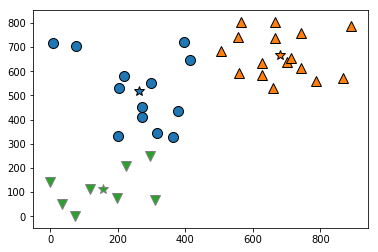

In [21]:
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import mglearn
from matplotlib.colors import ListedColormap

kmeans = KMeans(n_clusters=k)
kmeans.fit(arr_points)
centers = kmeans.cluster_centers_
mglearn.discrete_scatter(arr_points[:, 0], arr_points[:, 1], kmeans.labels_)
mglearn.discrete_scatter(centers[:,0], centers[:, 1], [0, 1, 2], markers='*')

### Question 3

Classifications:  [0 0 0 1 1 0 0 0 0 0 0 2 2 2 2 2 0 0 0 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


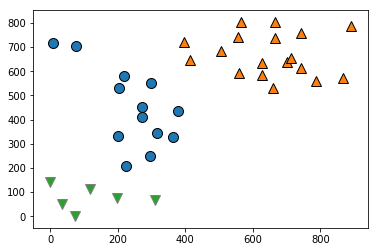

In [8]:
from sklearn.cluster import AgglomerativeClustering 
agc = AgglomerativeClustering(n_clusters=3)
classes = agc.fit_predict(arr_points)
print("Classifications: ", classes)
mglearn.discrete_scatter(arr_points[:, 0], arr_points[:, 1], classes)


### Question 4

Clusters [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


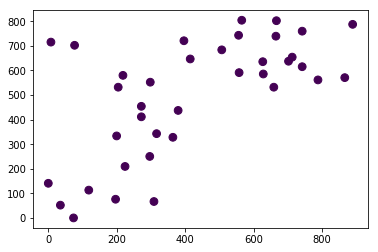

In [9]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
clusters = dbscan.fit_predict(arr_points)
print("Clusters", clusters)
pp.scatter(arr_points[:, 0], arr_points[:, 1], c=clusters, s=60)


### Question 5

In [10]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=1)
pca.fit(arr_points)
X_pca = pca.transform(arr_points) 
print("Components: ", pca.components_)


Components:  [[-0.74522385 -0.66681438]]
